In [7]:
import pandas as pd
import glob
import numpy as np
import pymrmr
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

In [3]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
from scipy.spatial.distance import cdist

In [54]:
axon_arbor_gf = pd.read_csv('arbor/axon_arbor_gf.csv')
basal_gf = pd.read_csv('arbor/basal_gf.csv')
apical_gf = pd.read_csv('arbor/apical_gf.csv')
full_feature_arbor = pd.read_csv('arbor_features.csv')
arbor_info_table = pd.read_csv('arbor/axon_arbor_info.csv')

In [56]:
basal_gf['Name'] = basal_gf['Name'].apply(lambda x: x.split('_basal')[0])
apical_gf['Name'] = apical_gf['Name'].apply(lambda x: x.split('.')[0])

In [58]:
axon_arbor_names = np.array(axon_arbor_gf['Name'].apply(lambda x:x[:-2]))
axon_arbor_id = np.array(axon_arbor_gf['Name'].apply(lambda x:int(x.split('_axon_')[1].split('.')[0])))

In [59]:
add_in_arbor = []
for i in range(full_feature_arbor.shape[0]):
    tmp_row = []
    name = full_feature_arbor['name'].iloc[i]
    b_id = basal_gf[basal_gf['Name'] == name].index[0]
    row_b = basal_gf[basal_gf.columns[1:]].iloc[b_id]
    tmp_row = tmp_row + list(row_b)
    
    if name in list(apical_gf['Name']):
        a_id = apical_gf[apical_gf['Name'] == name].index[0]
        row_a = apical_gf[apical_gf.columns[1:]].iloc[a_id]
    else:
        row_a = [0 for k in range(len(apical_gf.columns[1:]))]
    tmp_row = tmp_row + list(row_a)
    
    arbor_ids = axon_arbor_gf[axon_arbor_names== name].index.tolist()
    tmp_axon = {}
    for j in arbor_ids:
        arbor_name = axon_arbor_names[j]
        arbor_id = axon_arbor_id[j]
        info_id = arbor_info_table[(arbor_info_table['name'] == arbor_name)&(arbor_info_table['arbor_id'] == arbor_id)].index[0]
        arbor_order = arbor_info_table['arbor_order'].iloc[info_id]
        tmp_axon[arbor_order] = axon_arbor_gf[axon_arbor_gf.columns[1:]].iloc[j]
    for i in range(4):
        if i not in tmp_axon:
            tmp_row = tmp_row + [0 for k in range(len(axon_arbor_gf.columns[1:]))]
        else:
            tmp_row = tmp_row + list(tmp_axon[i])
    add_in_arbor.append(tmp_row)

In [61]:
add_in_arbor = np.array(add_in_arbor)

In [65]:
arbor_feature_table = full_feature_arbor.copy()
suffix = ['b','a','a1','a2','a3','a4']
n = 0
for i in range(6):
    for j in list(basal_gf.columns[1:]):
        arbor_feature_table[j+'_'+suffix[i]] = list(add_in_arbor[:,n])
        n += 1

/tmp/ipykernel_24997/1902111796.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  arbor_feature_table[j+'_'+suffix[i]] = list(add_in_arbor[:,n])
/tmp/ipykernel_24997/1902111796.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  arbor_feature_table[j+'_'+suffix[i]] = list(add_in_arbor[:,n])
/tmp/ipykernel_24997/1902111796.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(ax

In [70]:
full_feature_arbor.columns,basal_gf.columns

(Index(['name', 'region', 'max_density_basal', 'nodes_basal', 'p_length_basal',
        'volume_basal', 'branch_basal', 'd_to_soma_basal', 'd_to_soma2_basal',
        'hub_basal', 'variance_ratio_basal', 'max_density_apical',
        'nodes_apical', 'p_length_apical', 'volume_apical', 'branch_apical',
        'd_to_soma_apical', 'd_to_soma2_apical', 'hub_apical',
        'variance_ratio_apical', 'max_density_a1', 'num_nodes_a1',
        'total_path_length_a1', 'volume_a1', 'branch_a1', 'd_to_soma_a1',
        'd_to_soma2_a1', 'hub_a1', 'variance_ratio_a1', 'max_density_a2',
        'num_nodes_a2', 'total_path_length_a2', 'volume_a2', 'branch_a2',
        'd_to_soma_a2', 'd_to_soma2_a2', 'hub_a2', 'variance_ratio_a2',
        'max_density_a3', 'num_nodes_a3', 'total_path_length_a3', 'volume_a3',
        'branch_a3', 'd_to_soma_a3', 'd_to_soma2_a3', 'hub_a3',
        'variance_ratio_a3', 'max_density_a4', 'num_nodes_a4',
        'total_path_length_a4', 'volume_a4', 'branch_a4', 'd_to_som

In [72]:
### screen 
arbor_feature_table = arbor_feature_table.drop(['d_to_soma_basal','d_to_soma_apical','d_to_soma_a1',
                          'd_to_soma_a2','d_to_soma_a3','d_to_soma_a4','Nodes_b',
                          'Nodes_a','Nodes_a1','Nodes_a2','Nodes_a3','Nodes_a4',
                          'SomaSurface_b','SomaSurface_a','SomaSurface_a1','SomaSurface_a2',
                          'SomaSurface_a3','SomaSurface_a4','Bifurcations_b','Bifurcations_a',
                          'Bifurcations_a1','Bifurcations_a2','Bifurcations_a3','Bifurcations_a4',
                          'Branches_b','Branches_a','Branches_a1','Branches_a2','Branches_a3',
                          'Branches_a4','AverageDiameter_b','AverageDiameter_a','AverageDiameter_a1',
                          'AverageDiameter_a2','AverageDiameter_a3','AverageDiameter_a4',
                          'Surface_b','Surface_a','Surface_a1','Surface_a2','Surface_a3','Surface_a4',
                          'Volume_b','Volume_a','Volume_a1','Volume_a2','Volume_a3','Volume_a4',
                          'MaxPathDistance_b','MaxPathDistance_a','MaxPathDistance_a1','MaxPathDistance_a2',
                          'MaxPathDistance_a3','MaxPathDistance_a4'],axis=1)

In [74]:
full_feature_arbor2 = arbor_feature_table.drop(['name','region'],axis=1)
full_feature_arbor2 = full_feature_arbor2.astype(float)
S_arbor = (full_feature_arbor2-np.mean(full_feature_arbor2,axis=0))/np.std(full_feature_arbor2,axis=0)

In [79]:
S_arbor2 = S_arbor.dropna(axis=1,how='any')

Text(0.5, 0, '# cluster')

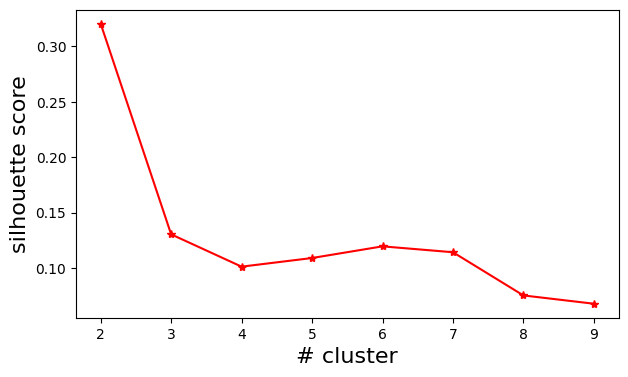

In [84]:
plt.figure(figsize=(7,4))
D_arbor = S_arbor2.T.corr()
a_linkage = linkage(D_arbor,method='average')

scores = []
for n in range(2,10):
    c = fcluster(a_linkage,t=n,criterion='maxclust')
    scores.append(silhouette_score(S_arbor2,c,metric='euclidean'))
plt.plot(range(2,10),scores,'r*-')
plt.ylabel('silhouette score',fontsize=16)
plt.xlabel('# cluster', fontsize=16)
# plt.savefig('figs_stats/kmeans_arbor.png',dpi=300,bbox_inches='tight')

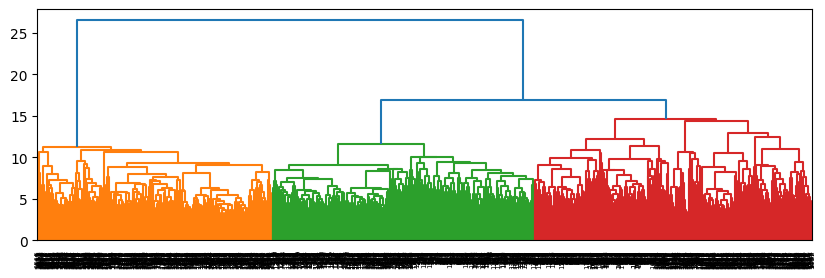

In [86]:
plt.figure(figsize=(10,3))
dendro_Z = dendrogram(a_linkage,color_threshold=15)

In [87]:
arbor_clusters = fcluster(a_linkage,t=15,criterion='distance')

In [8]:
clustermap_colorlist = ['#D93F49','#E28187','#EBBFC2','#D5E1E3','#AFC9CF',
                        '#8FB4BE']
clustermap_colorlist.reverse()
clustermap_cp = LinearSegmentedColormap.from_list("a",clustermap_colorlist)

/home/penglab/anaconda3/envs/python310/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/penglab/anaconda3/envs/python310/lib/python3.10/site-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


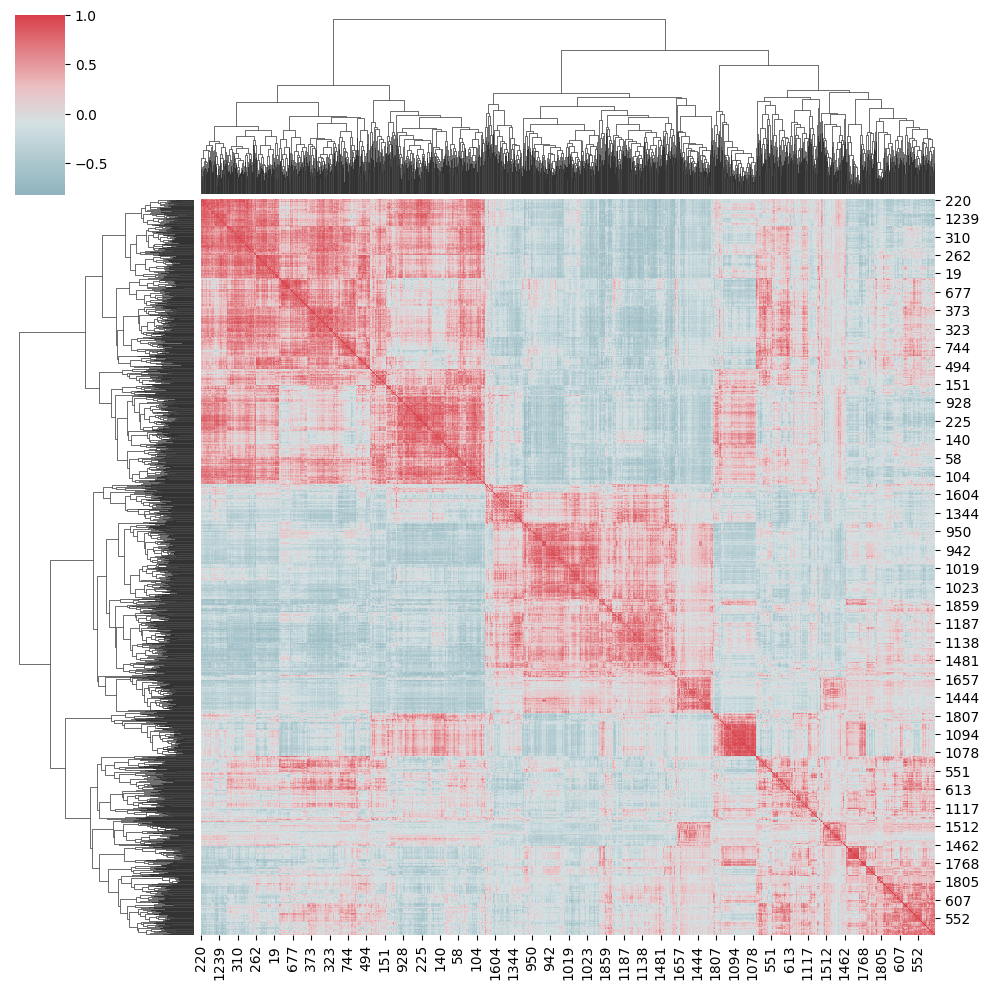

In [9]:
sns.clustermap(D_arbor,cmap = clustermap_cp)
# plt.savefig('figs_stats/clustermap_arbor.png',dpi=300, bbox_inches='tight')

In [21]:
full_feature_arbor2.std(axis=0)

max_density_basal        5.593835e+00
nodes_basal              4.994093e+01
p_length_basal           1.979171e+03
volume_basal             3.489573e+07
branch_basal             1.793815e+01
d_to_soma_basal          2.647578e+01
d_to_soma2_basal         4.889780e+01
hub_basal                3.484134e-01
variance_ratio_basal     5.578126e-02
max_density_apical       3.282118e+00
nodes_apical             5.684222e+01
p_length_apical          2.483717e+03
volume_apical            4.974209e+07
branch_apical            1.830330e+01
d_to_soma_apical         1.119769e+02
d_to_soma2_apical        1.089430e+02
hub_apical               4.792603e-01
variance_ratio_apical    2.309935e-01
max_density_a1           2.832666e+00
num_nodes_a1             3.751624e+02
total_path_length_a1     2.271430e+04
volume_a1                2.043623e+10
branch_a1                7.440815e+01
d_to_soma_a1             1.030486e+03
d_to_soma2_a1            1.141110e+03
hub_a1                   7.401116e-01
variance_rat

405

In [ ]:
t3 = pd.read_csv('bouton_features.csv')
t3 = t3[t3['Cell name'].isin(list(full_feature_arbor['name']))]
t3 = t3.reset_index(drop=True)

In [ ]:
bouton_F = t3.drop('Cell name',axis=1)
bouton_F = bouton_F.astype(float)
S_bouton = (bouton_F-np.mean(bouton_F,axis=0))/np.std(bouton_F,axis=0)
plt.figure(figsize=(15,4))
D_bouton = S_bouton.T.corr()
b_linkage = linkage(D_bouton,method='average')


In [ ]:
scores = []
for n in range(2,15):
    c = fcluster(b_linkage,t=n,criterion='maxclust')
    scores.append(silhouette_score(S_bouton,c,metric='euclidean'))
plt.plot(range(2,15),scores,'r*-')
plt.ylabel('silhouette score',fontsize=16)
plt.xlabel('# cluster', fontsize=16)
plt.savefig('figs_stats/kmeans_bouton.png',dpi=300,bbox_inches='tight')

In [ ]:
sns.clustermap(D_bouton,cmap = clustermap_cp)
plt.savefig('figs_stats/clustermap_bouton.png',dpi=300, bbox_inches='tight')

In [ ]:
tract_feature = pd.read_csv('motif_features.csv')
tract_feature = tract_feature[tract_feature['Unnamed: 0'].isin(list(full_feature_arbor['name']))]
tract_feature = tract_feature.reset_index(drop=True)

In [ ]:
tract_F = tract_feature.drop('Unnamed: 0',axis=1)
tract_F = tract_F.astype(float)
S_tract = (tract_F-np.mean(tract_F,axis=0))/np.std(tract_F,axis=0)
plt.figure(figsize=(15,4))
D_tract = S_tract.T.corr()
t_linkage = linkage(D_tract,method='average')

In [ ]:
scores = []
for n in range(2,15):
    c = fcluster(t_linkage,t=n,criterion='maxclust')
    scores.append(silhouette_score(S_tract,c,metric='euclidean'))
plt.plot(range(2,15),scores,'r*-')
plt.ylabel('silhouette score',fontsize=16)
plt.xlabel('# cluster', fontsize=16)
plt.savefig('figs_stats/kmeans_tract.png',dpi=300,bbox_inches='tight')

In [ ]:
sns.clustermap(D_tract,cmap = clustermap_cp)
plt.savefig('figs_stats/clustermap_tract.png',dpi=300, bbox_inches='tight')

In [ ]:
full_feature = pd.read_csv('ana_features_dataframe.csv')

In [ ]:
full_F = full_feature.drop(['name','cluster','brain_region','soma_region',
                            'asymmetry_min','asymmetry_max','br_length_min',
                            'br_order_min','br_tortuosity_min','br_tortuosity_max',
                            'bif_PathDist2soma_min','bif_EucDist2soma_min',
                            'ampl_local_min','ampl_remote_min','tilt_local_min',
                            'tilt_remote_min'],axis=1)
full_F = full_F.astype(float)
S_full = (full_F-np.mean(full_F,axis=0))/np.std(full_F,axis=0)
plt.figure(figsize=(15,4))
D_full = S_full.T.corr()
f_linkage = linkage(D_full,method='average')

In [ ]:
scores = []
for n in range(2,15):
    c = fcluster(f_linkage,t=n,criterion='maxclust')
    scores.append(silhouette_score(S_full,c,metric='euclidean'))
plt.plot(range(2,15),scores,'r*-')
plt.tick_params(labelsize=15)
plt.ylabel('silhouette score',fontsize=16)
plt.xlabel('# cluster', fontsize=16)
plt.savefig('figs_stats/kmeans_full.png',dpi=300,bbox_inches='tight')

In [ ]:
sns.clustermap(D_full,cmap = clustermap_cp)
plt.savefig('figs_stats/clustermap_full.png',dpi=300, bbox_inches='tight')